# Redes Neurais - Imagens - Scikit learn

**Etapas**<br>
•Passo 1  - Carregar as bibliotecas<br>
•Passo 2  - Carregar base de dados<br>
•Passo 3  - Visualização de dados<br>
•Passo 4  - Construção dp alvo<br>
•Passo 5  - Treinamento do Modelo<br>
•Passo 6  - Avaliação dos resultados<br>
•Passo 7  - Tratamento dos dados<br>
•Passo 8  - Re-treinamento do modelo<br>
•Passo 9  - Re-avaliação do modelo<br>
•Passo 10 - Live test<br>
•Passo 11 - Salvando o modelo para uso futuro com pickle<br>

# Passo 1 - Carregar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [4]:
import os
os.chdir('C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados')

train = pd.read_csv("mnist_train.csv", sep = ",", header = None)
test = pd.read_csv("mnist_test.csv", sep = ",", header = None)

print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [12]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


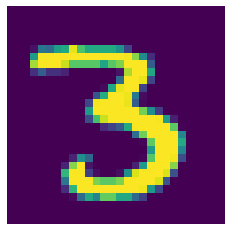

In [6]:
num = train.iloc[12][1:train.shape[1]]
numtrix = num.values.reshape(28,28) #Pegando uma linha de 784 pontos e transformando numa matriz de 28x28
plt.imshow(numtrix)
plt.axis('off');

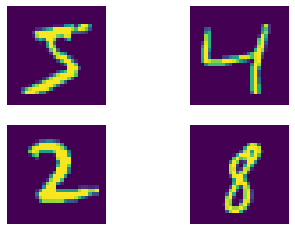

In [9]:
num = train.iloc[0][1:]
numtrix = num.values.reshape(28,28)
plt.subplot(221) # . suplot vai criar uma divisao de 2x2 e vai colocar esse plot na primeira posição
plt.imshow(numtrix)
plt.axis('off');
num = train.iloc[2][1:]
numtrix = num.values.reshape(28,28)
plt.subplot(222)
plt.imshow(numtrix)
plt.axis('off');
num = train.iloc[252][1:]
numtrix = num.values.reshape(28,28)
plt.subplot(223)
plt.imshow(numtrix)
plt.axis('off');
num = train.iloc[300][1:]
numtrix = num.values.reshape(28,28)
plt.subplot(224)
plt.imshow(numtrix)
plt.axis('off');


# Passo 4 - Construção do alvo

In [15]:
train.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Separando os dados com as variáveis em x e o alvo em y

yTrain = train.iloc[0:][0]
yTest = test.iloc[0:][0]

xTrain = train.iloc[:,1:]
xTest = test.iloc[:,1:]

# Passo 5 - Treinando do modelo

In [22]:
# Treinando o modelo

mlp1 = MLPClassifier(hidden_layer_sizes = (50), max_iter = 150,      # hidden_layer_sizes = número de neurônios
                    solver= "sgd", verbose = 10,  tol = 1e-4, random_state=42,
                    learning_rate_init = .1, activation = "logistic")

mlp1.fit(xTrain, yTrain) # Essa é a linha que treina o modelo

Iteration 1, loss = 1.11658915
Iteration 2, loss = 1.02172375
Iteration 3, loss = 0.96790196
Iteration 4, loss = 1.06945370
Iteration 5, loss = 0.94244357
Iteration 6, loss = 0.82083713
Iteration 7, loss = 0.93696444
Iteration 8, loss = 0.96824914
Iteration 9, loss = 0.80963857
Iteration 10, loss = 0.90238623
Iteration 11, loss = 0.85593199
Iteration 12, loss = 0.82938546
Iteration 13, loss = 0.87109614
Iteration 14, loss = 0.86760296
Iteration 15, loss = 0.82544071
Iteration 16, loss = 0.87724421
Iteration 17, loss = 0.86691632
Iteration 18, loss = 0.90103306
Iteration 19, loss = 0.83220890
Iteration 20, loss = 0.80844516
Iteration 21, loss = 0.83756242
Iteration 22, loss = 0.83856531
Iteration 23, loss = 0.82883353
Iteration 24, loss = 0.80001129
Iteration 25, loss = 0.78307920
Iteration 26, loss = 0.74198069
Iteration 27, loss = 0.76362775
Iteration 28, loss = 0.76581746
Iteration 29, loss = 0.74937165
Iteration 30, loss = 0.74854285
Iteration 31, loss = 0.76821354
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=50,
              learning_rate_init=0.1, max_iter=150, random_state=42,
              solver='sgd', verbose=10)

In [25]:
predTest = mlp1.predict(xTest)

In [26]:
# Como avaliar os resultados?

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest, predTest))

[[ 899    0    9   15    0   28   20    1    8    0]
 [   1 1100   17    3    1    0    5    3    5    0]
 [  28   25  749   34   40    6   33   28   76   13]
 [  16   20   59  761    4   56   12   21   52    9]
 [   0    3    8    2  900    0   15    9    9   36]
 [  94    5   14   75   28  571   37   12   48    8]
 [  21    3   28    2   41   14  846    1    2    0]
 [   1   33   22   10   14    9    0  884   14   41]
 [  16   26   49   49   36   16   14   17  720   31]
 [  11   14    4   16  141   18    2  178   30  595]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       980
           1       0.90      0.97      0.93      1135
           2       0.78      0.73      0.75      1032
           3       0.79      0.75      0.77      1010
           4       0.75      0.92      0.82       982
           5       0.80      0.64      0.71       892
           6       0.86      0.88      

In [27]:
print("Acc. treinamento: %f" % mlp1.score(xTrain, yTrain))
print("Acc. teste: %f" % mlp1.score(xTest, yTest))

Acc. treinamento: 0.793600
Acc. teste: 0.802500


# Passo 7 - Tratamento dos dados

In [31]:
fator = 0.99/255
minVal = 0.01

# Transformando os valores do pixels para uma amplitude entre 0 e 1, e transformanfo os valores 0 em 0.01

In [32]:
xTrain2 = xTrain*fator + minVal
xTest2 = xTest*fator + minVal

# Passo 8 - re-treinamento do modelo

In [34]:
# treinando o novo modelo

mlp2 = MLPClassifier(hidden_layer_sizes = (50), max_iter = 150,     
                    solver= "sgd", verbose = 10,  tol = 1e-4, random_state=42,
                    learning_rate_init = .1, activation = "logistic")

mlp2.fit(xTrain2, yTrain) # Essa é a linha que treina o modelo

Iteration 1, loss = 0.58232266
Iteration 2, loss = 0.26288109
Iteration 3, loss = 0.21394732
Iteration 4, loss = 0.18129787
Iteration 5, loss = 0.15838322
Iteration 6, loss = 0.14081851
Iteration 7, loss = 0.12809968
Iteration 8, loss = 0.11727554
Iteration 9, loss = 0.10859253
Iteration 10, loss = 0.10090617
Iteration 11, loss = 0.09444876
Iteration 12, loss = 0.08928165
Iteration 13, loss = 0.08429889
Iteration 14, loss = 0.08016405
Iteration 15, loss = 0.07613148
Iteration 16, loss = 0.07259375
Iteration 17, loss = 0.06914923
Iteration 18, loss = 0.06637718
Iteration 19, loss = 0.06361515
Iteration 20, loss = 0.06121733
Iteration 21, loss = 0.05879613
Iteration 22, loss = 0.05670163
Iteration 23, loss = 0.05442957
Iteration 24, loss = 0.05266647
Iteration 25, loss = 0.05103100
Iteration 26, loss = 0.04915823
Iteration 27, loss = 0.04740529
Iteration 28, loss = 0.04579925
Iteration 29, loss = 0.04427900
Iteration 30, loss = 0.04296224
Iteration 31, loss = 0.04150228
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=50,
              learning_rate_init=0.1, max_iter=150, random_state=42,
              solver='sgd', verbose=10)

In [41]:
# Predições para o teste
predTest2 = mlp2.predict(xTest2)

In [42]:
print(confusion_matrix(yTest, predTest2))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest, predTest2))

[[ 966    0    3    1    1    2    2    1    3    1]
 [   0 1121    2    1    0    1    4    1    5    0]
 [   4    2 1003    2    6    1    4    5    5    0]
 [   0    0    4  985    0    5    0    6    7    3]
 [   1    1    5    1  955    0    2    2    3   12]
 [   3    0    0   18    2  855    3    3    7    1]
 [   5    2    3    2    3    5  933    1    4    0]
 [   2    4    8    6    1    1    0  998    1    7]
 [   5    1    6    3    1    4    2    5  945    2]
 [   1    4    0    8    8    3    1    6    2  976]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      

In [44]:
print("Acc. treinamento: %f" % mlp2.score(xTrain2, yTrain))
print("Acc. teste: %f" % mlp2.score(xTest2, yTest))

Acc. treinamento: 0.999833
Acc. teste: 0.973700


# Passo 10 - Live test

In [45]:
from PIL import Image

In [46]:
# carrega a imagem monocromática

num = np.array(Image.open('IMG.bmp'))
num.shape

(28, 28)

In [49]:
#Converte a matriz em um vetor
num = num.ravel()
num.shape

(784,)

In [50]:
num

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,

In [51]:
num = np.where(num == True, 0, 1)

In [53]:
num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [58]:
num = num.reshape(1,-1)

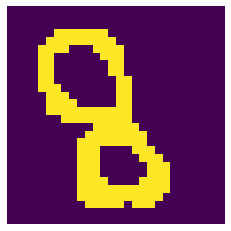

In [60]:
numtrix = num.reshape(28,28)
plt.imshow(numtrix)
plt.axis('off');

In [70]:
def leNum (modelo, imagem):
    num = np.array(Image.open(imagem))
    num = np.where(num == True, 0, 1)
    num = num.reshape(1,-1)
    numtrix = num.reshape(28,28)
    plt.imshow(numtrix)
    plt.axis('off');
    print("Numero previsto: ", modelo.predict(num))
    print("Numero real: ")

Numero previsto:  [5]
Numero real: 


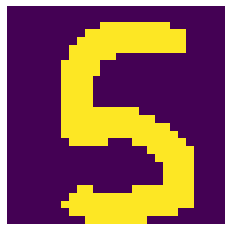

In [89]:
#predições para o teste

leNum(mlp2, "IMG.bmp")